<a href="https://colab.research.google.com/github/brendaFlavia/DeepLearningAssignment/blob/main/Copy_of_Copy_of_LungOpacity2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import pathlib
import glob
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models, utils, losses, callbacks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, accuracy_score, roc_auc_score
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import pathlib
#train and Validation data directory 
#data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/Dataset1') 

#test data directory
#test_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/unknown_images') 
#test_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/test_unknown') 

#train and Validation data directory 
train_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/train_images') 

#test data directory
test_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/test_images') 

#path to test dataset 2
dataset2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/Dataset2') 
test_data_set2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/Dataset2')

#path to unknown images labels
test_data2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/unknown_images')

Mounted at /content/gdrive


In [ ]:
img_width, img_height = 391,488
batch_size = 20

In [ ]:
#unknown images
test_ds2 = tf.keras.utils.image_dataset_from_directory(
  test_data2,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=50
  )

Found 50 files belonging to 1 classes.


In [ ]:
#dataset 2
test_datas2 = tf.keras.utils.image_dataset_from_directory(
  test_data_set2,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=224
  )

Found 224 files belonging to 2 classes.


In [ ]:
# Define image data generators
# Train data


train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 689 files belonging to 2 classes.
Using 552 files for training.


In [ ]:
# Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 689 files belonging to 2 classes.
Using 137 files for validation.


In [ ]:
#test dataset
test_data = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  shuffle=True,
  image_size=(img_height, img_width),
  batch_size=26
  )


Found 26 files belonging to 2 classes.


In [ ]:
# Load class names for the dataset
class_names = val_ds.class_names
print(class_names)

In [ ]:
# Load class names for the dataset
class_names = train_ds.class_names
print(class_names)

['normal', 'sick']


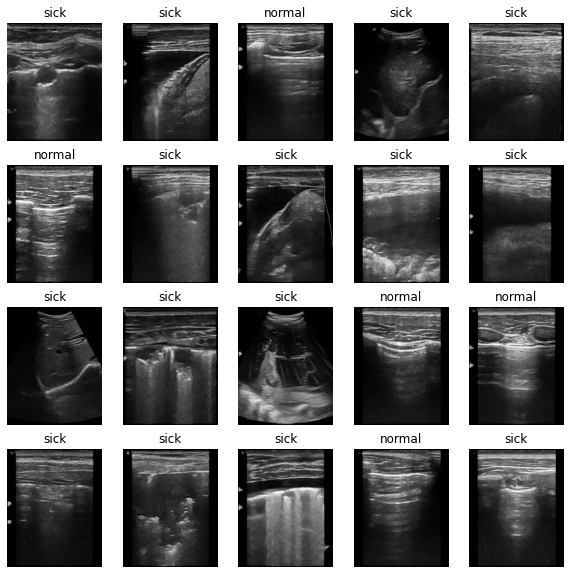

In [ ]:


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 488, 391, 3)
(20,)


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#create a model
model = models.Sequential()

creat seguential model that uses rectified linear activation function. output the input directly if it is positive, otherwise, it will output zero 

In [ ]:
#num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(2)
])

use loss function SparseCategoricalCrossentropy because it Computes the crossentropy loss between the labels and predictions

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
result=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
)

Epoch 1/10
28/28 [==============================] - 86s 2s/step - loss: 1.6043 - accuracy: 0.7681 - val_loss: 0.3754 - val_accuracy: 0.8759
Epoch 2/10
28/28 [==============================] - 4s 135ms/step - loss: 0.1736 - accuracy: 0.9348 - val_loss: 0.1158 - val_accuracy: 0.9708
Epoch 3/10
28/28 [==============================] - 4s 135ms/step - loss: 0.0521 - accuracy: 0.9783 - val_loss: 0.0802 - val_accuracy: 0.9781
Epoch 4/10
28/28 [==============================] - 4s 135ms/step - loss: 0.0240 - accuracy: 0.9946 - val_loss: 0.0775 - val_accuracy: 0.9781
Epoch 5/10
28/28 [==============================] - 4s 135ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.1100 - val_accuracy: 0.9708
Epoch 6/10
28/28 [==============================] - 4s 136ms/step - loss: 0.0141 - accuracy: 0.9964 - val_loss: 0.1154 - val_accuracy: 0.9635
Epoch 7/10
28/28 [==============================] - 4s 137ms/step - loss: 0.0060 - accuracy: 0.9982 - val_loss: 0.1289 - val_accuracy: 0.9854
Epoch 8/

Check Accuracy on different datasets

In [ ]:
#test dataset
test_loss, test_acc = model.evaluate(test_data)

1/1 [==============================] - 4s 4s/step - loss: 1.2525e-05 - accuracy: 1.0000


In [ ]:
print(test_acc)

1.0


In [ ]:
#validation set
test_loss, test_acc = model.evaluate(val_ds)

7/7 [==============================] - 0s 59ms/step - loss: 0.3833 - accuracy: 0.9343


In [ ]:
#train set
test_loss, test_acc = model.evaluate(train_ds)

28/28 [==============================] - 1s 52ms/step - loss: 2.0836e-04 - accuracy: 1.0000


In [ ]:
test_loss, test_acc = model.evaluate(test_data2)

Visualize Training and Validation Loss and Accuracy

Text(0.5, 1.0, 'Training and Validation Accuracy')

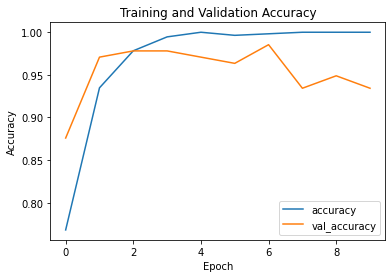

In [ ]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

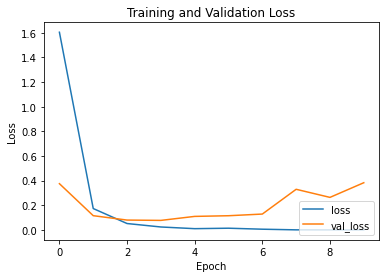

In [ ]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

Make Predictions on Known Images Lables

Predictions:
 [0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0]
Labels:
 [0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0]


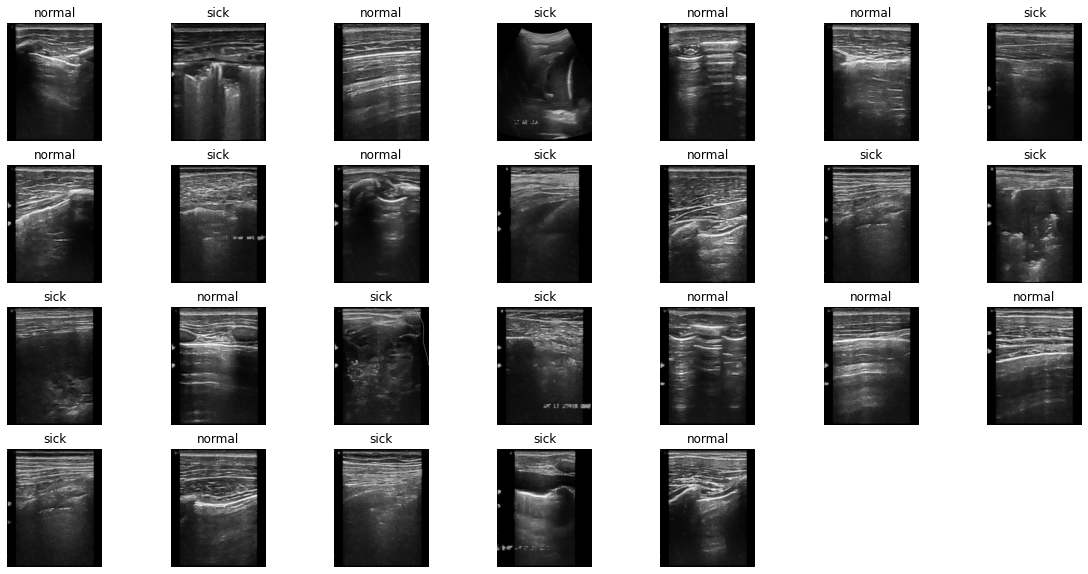

In [ ]:
image_batch, label_batch = test_data.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(26):
  ax = plt.subplot(4, 7, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

Confusion matrix on test data

In [ ]:
y_pred = []  # storing predicted labels
y_true = []  # storing true labels

for image_batch, label_batch in test_data:
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm=confusion_matrix(predicted_labels, correct_labels)
print (cm)

[[13  0]
 [ 0 13]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



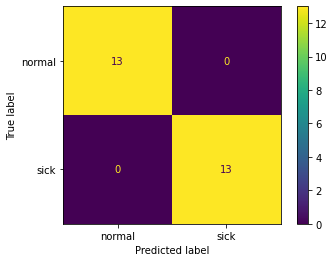

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()

plt.show()

Apply Data Augumentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

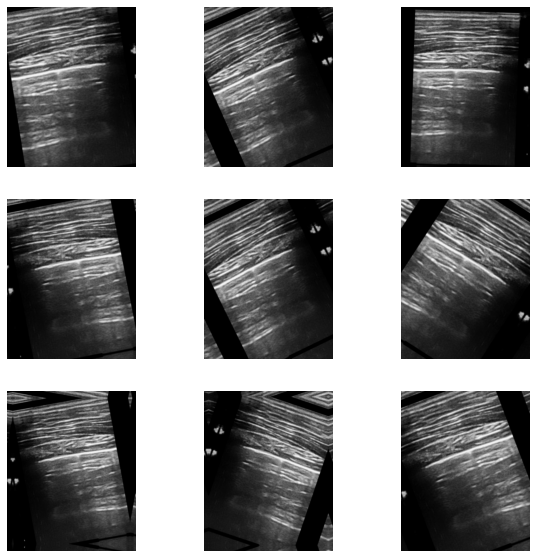

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
    data_augmentation,
  tf.keras.layers.Rescaling(1./255,input_shape=(391, 488, 3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
#complie model

model.compile(
  optimizer='adam',SparseCategoricalCrossentropy
  loss=tf.keras.losses.(from_logits=True),
  metrics=['accuracy'])

In [ ]:
#es=EarlyStopping(monitor='val_loss', mode='min',verbose=1)

In [ ]:
#fit the model

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
28/28 [==============================] - 6s 128ms/step - loss: 1.6911 - accuracy: 0.7047 - val_loss: 0.6171 - val_accuracy: 0.7664
Epoch 2/20
28/28 [==============================] - 3s 97ms/step - loss: 0.3448 - accuracy: 0.8478 - val_loss: 0.4229 - val_accuracy: 0.8102
Epoch 3/20
28/28 [==============================] - 3s 97ms/step - loss: 0.3083 - accuracy: 0.8696 - val_loss: 0.5728 - val_accuracy: 0.7956
Epoch 4/20
28/28 [==============================] - 3s 101ms/step - loss: 0.2874 - accuracy: 0.8768 - val_loss: 0.3975 - val_accuracy: 0.8248
Epoch 5/20
28/28 [==============================] - 3s 99ms/step - loss: 0.1908 - accuracy: 0.9185 - val_loss: 0.6088 - val_accuracy: 0.7810
Epoch 6/20
28/28 [==============================] - 3s 100ms/step - loss: 0.1723 - accuracy: 0.9203 - val_loss: 0.3273 - val_accuracy: 0.8467
Epoch 7/20
28/28 [==============================] - 3s 99ms/step - loss: 0.2125 - accuracy: 0.9058 - val_loss: 0.3586 - val_accuracy: 0.8321
Epoch 8/20

Test **accuracy** Images

In [ ]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)

1/1 - 0s - loss: 0.1338 - accuracy: 0.8846 - 439ms/epoch - 439ms/step


In [ ]:
test_loss, test_acc = model.evaluate(train_ds, verbose=2)

28/28 - 1s - loss: 0.0501 - accuracy: 0.9746 - 904ms/epoch - 32ms/step


In [ ]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

7/7 - 0s - loss: 0.1615 - accuracy: 0.9343 - 283ms/epoch - 40ms/step


In [ ]:
test_loss, test_acc = model.evaluate(test_datas2)

1/1 [==============================] - 27s 27s/step - loss: 4.1799 - accuracy: 0.4464


Visualize Training an validation Results

Text(0.5, 1.0, 'Training and Validation Accuracy')

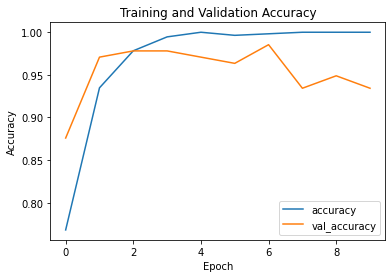

In [ ]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

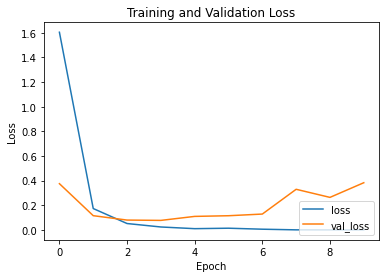

In [ ]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

**Apply L2 Regulization to reduce overfitting and dropout layer and also increase the number of layers.
Also add add a penalty for weight size to the loss function.**

In [ ]:
num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
    data_augmentation,
  tf.keras.layers.Rescaling(1./255,input_shape=(391, 488, 3)),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same" ,kernel_regularizer=l2(0.0005)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same",kernel_regularizer=l2(0.0005)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, 3, activation='relu', padding="same",kernel_regularizer=l2(0.0005)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(512, 5, activation='relu', padding="same",kernel_regularizer=l2(0.0005)),
  tf.keras.layers.MaxPooling2D(4,4),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [ ]:
#complie model

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
28/28 [==============================] - 6s 212ms/step - loss: 0.0448 - accuracy: 0.9909 - val_loss: 0.1783 - val_accuracy: 0.9416
Epoch 2/30
28/28 [==============================] - 6s 213ms/step - loss: 0.0809 - accuracy: 0.9801 - val_loss: 0.1974 - val_accuracy: 0.9270
Epoch 3/30
28/28 [==============================] - 6s 214ms/step - loss: 0.0477 - accuracy: 0.9928 - val_loss: 0.1623 - val_accuracy: 0.9416
Epoch 4/30
28/28 [==============================] - 6s 216ms/step - loss: 0.0490 - accuracy: 0.9891 - val_loss: 0.1216 - val_accuracy: 0.9489
Epoch 5/30
28/28 [==============================] - 6s 217ms/step - loss: 0.0298 - accuracy: 0.9964 - val_loss: 0.1240 - val_accuracy: 0.9708
Epoch 6/30
28/28 [==============================] - 6s 220ms/step - loss: 0.0420 - accuracy: 0.9891 - val_loss: 0.1364 - val_accuracy: 0.9562
Epoch 7/30
28/28 [==============================] - 6s 220ms/step - loss: 0.0589 - accuracy: 0.9873 - val_loss: 0.4057 - val_accuracy: 0.8759
Epoch 

Text(0.5, 1.0, 'Training and Validation Accuracy')

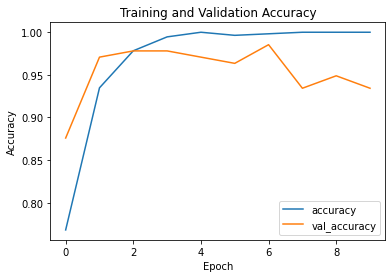

In [ ]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

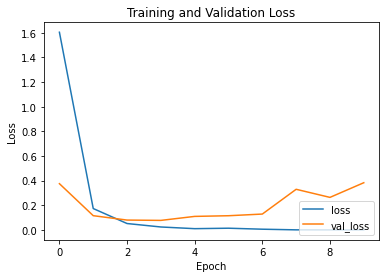

In [ ]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [ ]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

7/7 - 1s - loss: 0.2966 - accuracy: 0.9051 - 531ms/epoch - 76ms/step


In [ ]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)

1/1 - 1s - loss: 0.2621 - accuracy: 0.9231 - 1s/epoch - 1s/step


In [ ]:
test_loss, test_acc = model.evaluate(train_ds, verbose=2)

28/28 - 2s - loss: 0.3544 - accuracy: 0.8605 - 2s/epoch - 69ms/step


In [ ]:
test_loss, test_acc = model.evaluate(test_datas2, verbose=2)

1/1 - 7s - loss: 2.6689 - accuracy: 0.4509 - 7s/epoch - 7s/step


Classify the unknown images

In [ ]:
csv_data2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/image_results4.csv')
test_data2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/unknown_images')

Classification of unknown images

Predictions:
 [0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 1 0]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


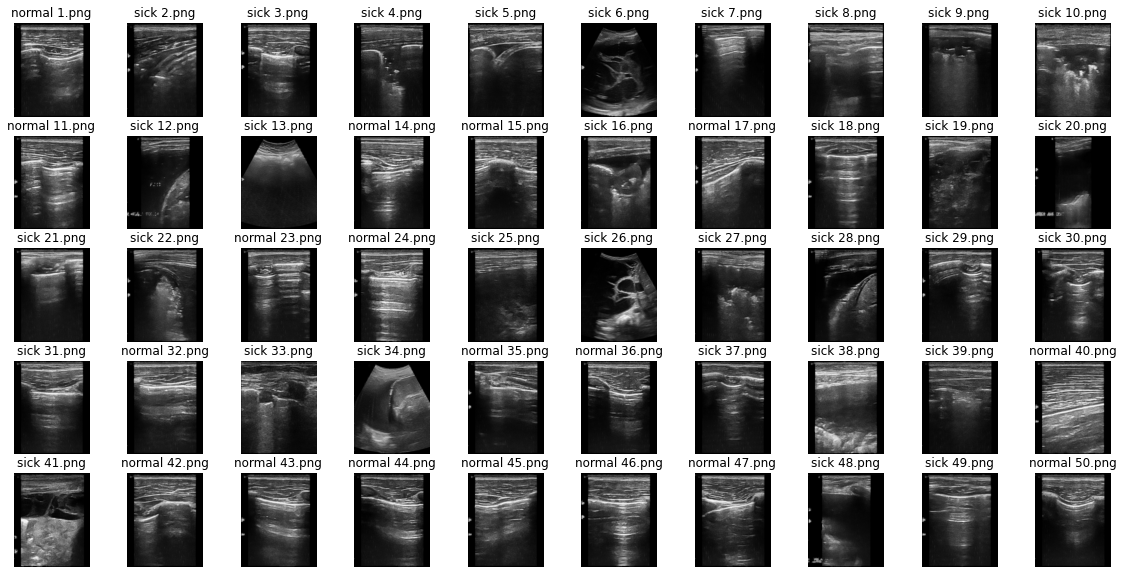

In [ ]:
image_batch, label_batch = test_ds2.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]]+ ' '+ str(i+1)+'.png')
  plt.axis("off")

SAVE RESULTS IN CSV

In [ ]:
  
# display the array
print(predictions.numpy())
  
# convert array into dataframe
DF = pd.DataFrame(predictions)
  
# save the dataframe as a csv file
DF.to_csv(csv_data2)

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1
 1 1 0 1 0 0 0 0 0 0 1 1 0]


PREDICTIONS ON KNOWN DATASET 2

In [ ]:
dataset2 = pathlib.Path('/content/gdrive/My Drive/DeepLearning/Dataset2/normal/sick_eff100.png') 


#image_path = tf.keras.utils.get_file('Known_image', origin=dataset2)

img = tf.keras.utils.load_img(
    dataset2, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sick with a 99.98 percent confidence.


In [ ]:
test_data_set2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/Dataset2')

In [ ]:
image_batch, label_batch = test_datas2.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

#plt.figure(figsize=(20, 10))
#for i in range(10):
  #ax = plt.subplot(10, 10, i + 1)
  #plt.imshow(image_batch[i].astype("uint8"))
  #plt.title(class_names[predictions[i]])
  #plt.axis("off")

Predictions:
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Labels:
 [0 1 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1
 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 0
 1 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0
 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0
 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0
 0 1]


Evalute model on Dataset 2

In [ ]:
test_loss1, test_acc1 = model.evaluate(test_datas2, verbose=2)

1/1 - 2s - loss: 2.6689 - accuracy: 0.4509 - 2s/epoch - 2s/step


In [ ]:
y_pred = []  # storing predicted labels
y_true = []  # storing true labels

for image_batch, label_batch in test_datas2:
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm=confusion_matrix(predicted_labels, correct_labels)
print (cm)

[[  1  12]
 [111 100]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.08      0.01      0.02       112
           1       0.47      0.89      0.62       112

    accuracy                           0.45       224
   macro avg       0.28      0.45      0.32       224
weighted avg       0.28      0.45      0.32       224



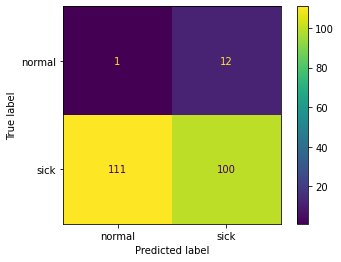

In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()

plt.show()

In [ ]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
28/28 [==============================] - 6s 214ms/step - loss: 0.1908 - accuracy: 0.9457 - val_loss: 0.5418 - val_accuracy: 0.7299
Epoch 2/100
28/28 [==============================] - 6s 213ms/step - loss: 0.1735 - accuracy: 0.9511 - val_loss: 0.8707 - val_accuracy: 0.6058
Epoch 3/100
28/28 [==============================] - 6s 214ms/step - loss: 0.1632 - accuracy: 0.9583 - val_loss: 0.2497 - val_accuracy: 0.9270
Epoch 4/100
28/28 [==============================] - 6s 214ms/step - loss: 0.1733 - accuracy: 0.9529 - val_loss: 0.9291 - val_accuracy: 0.5985
Epoch 5/100
28/28 [==============================] - 6s 215ms/step - loss: 0.1648 - accuracy: 0.9511 - val_loss: 0.7849 - val_accuracy: 0.6423
Epoch 6/100
28/28 [==============================] - 6s 215ms/step - loss: 0.1504 - accuracy: 0.9475 - val_loss: 0.2835 - val_accuracy: 0.9197
Epoch 7/100
28/28 [==============================] - 6s 216ms/step - loss: 0.1582 - accuracy: 0.9529 - val_loss: 0.2719 - val_accuracy: 0.9416

Text(0.5, 1.0, 'Training and Validation Accuracy')

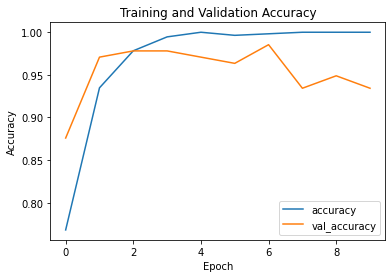

In [ ]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

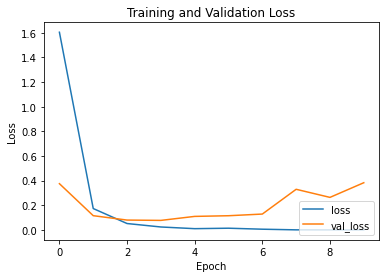

In [ ]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [ ]:
test_loss1, test_acc1 = model.evaluate(test_ds2, verbose=2)

1/1 - 0s - loss: 6.6646 - accuracy: 0.4000 - 436ms/epoch - 436ms/step


In [ ]:
test_loss1, test_acc1 = model.evaluate(test_datas2, verbose=2)

1/1 - 2s - loss: 7.1777 - accuracy: 0.4509 - 2s/epoch - 2s/step


In [ ]:
test_loss1, test_acc1 = model.evaluate(val_ds, verbose=2)

7/7 - 1s - loss: 0.2209 - accuracy: 0.9197 - 552ms/epoch - 79ms/step


Predictions:
 [0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 1]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


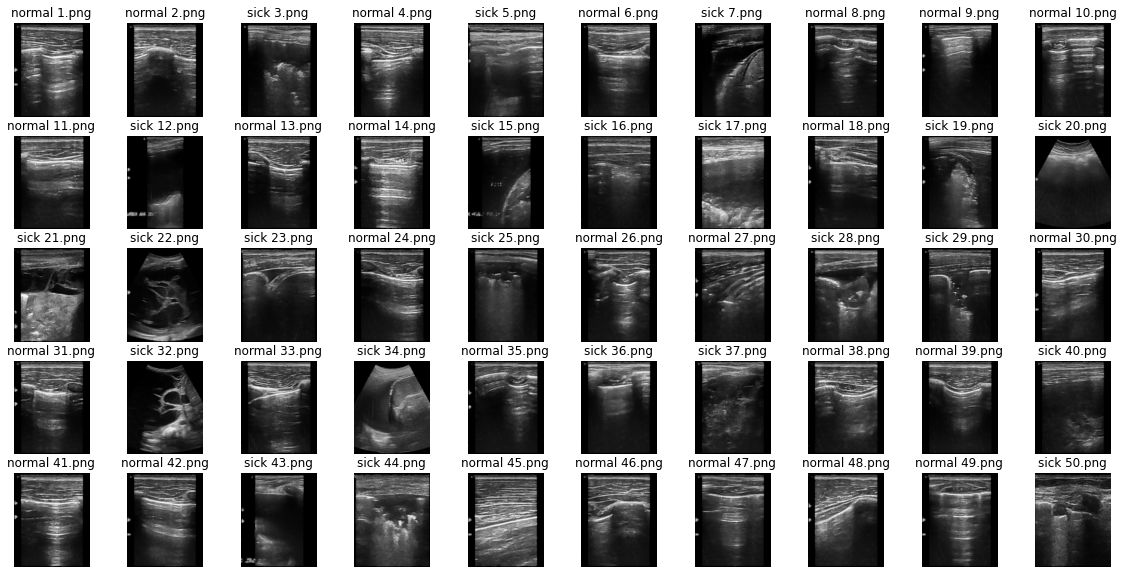

In [ ]:
image_batch, label_batch = test_ds2.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]]+ ' '+ str(i+1)+'.png')
  plt.axis("off")

In [ ]:
csv_data2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/image_results3.csv')

In [ ]:
# display the array
print(predictions.numpy())
  
# convert array into dataframe
DF = pd.DataFrame(predictions)
  
# save the dataframe as a csv file
DF.to_csv(csv_data2)

[0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 0 1]
